<a href="https://colab.research.google.com/github/Nandan0402/Car-Price-Prediction-ML/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import sklearn.metrics as metrics

In [4]:
car_dataset = pd.read_csv('car data.csv')

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagonr,2011,2.85,4.15,52000,CNG,Individual,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.shape

(10, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       10 non-null     object 
 1   Year           10 non-null     int64  
 2   Selling_Price  10 non-null     float64
 3   Present_Price  10 non-null     float64
 4   Driven_kms     10 non-null     int64  
 5   Fuel_Type      10 non-null     object 
 6   Seller_Type    10 non-null     object 
 7   Transmission   10 non-null     object 
 8   Owner          10 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 852.0+ bytes


In [8]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    5
Diesel    4
CNG       1
Name: count, dtype: int64
Seller_Type
Dealer        7
Individual    3
Name: count, dtype: int64
Transmission
Manual       8
Automatic    2
Name: count, dtype: int64


In [10]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-2262391978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-2262391978.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-2262391978.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagonr,2011,2.85,4.15,52000,2,1,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(Y)

0     3.35
1     4.75
2     7.25
3     2.85
4     4.60
5     9.25
6    15.00
7    10.50
8     6.50
9     1.90
Name: Selling_Price, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [15]:
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
traning_data_prediction = lin_reg_model.predict(X_train)

In [18]:
error_score = metrics.r2_score(Y_train, traning_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9989465593378968


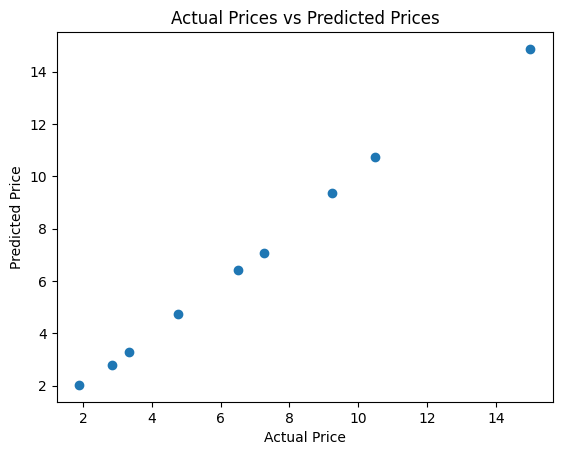

In [19]:
plt.scatter(Y_train, traning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [20]:
lasso_reg_model = Lasso()

In [21]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [22]:
traning_data_prediction = lasso_reg_model.predict(X_train)
print("R squard error",error_score)

R squard error 0.9989465593378968


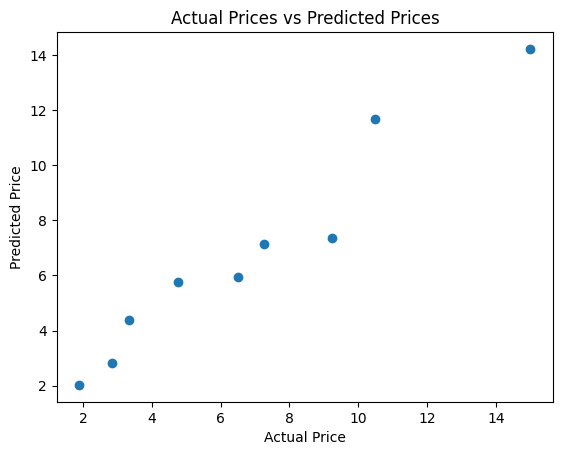

In [27]:
plt.scatter(Y_train, traning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [24]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [25]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


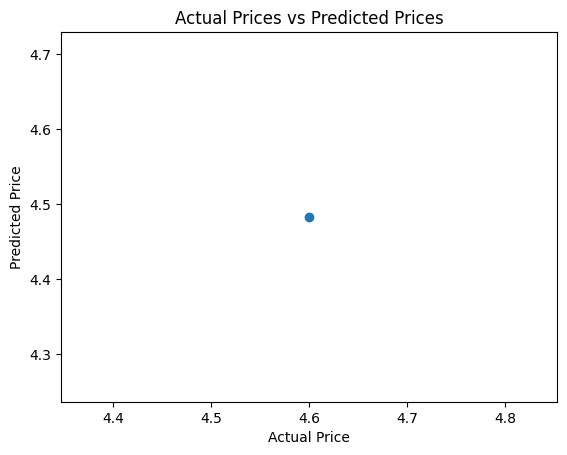

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()